**프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!**

(1) 데이터 가져오기

In [71]:
from sklearn import datasets
dataset = datasets.load_diabetes()

In [72]:
x_data = dataset.data
y_data = dataset.target
print(x_data) 
print(y_data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

(2) 모델에 입력할 데이터 x, y 준비하기

In [73]:
import numpy as np

x = np.array(x_data)
y = np.array(y_data)


(3) train 데이터와 test 데이터로 분리하기

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
print('X_train 개수:', len(X_train),',X_test 개수:', len(X_test))

X_train 개수: 353 ,X_test 개수: 89


In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


(4) 모델 준비하기

In [77]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print("GOOD")

GOOD


In [78]:
W

array([0.2411    , 0.7347397 , 0.37811349, 0.14133326, 0.86557285,
       0.56044374, 0.7667174 , 0.37568552, 0.566782  , 0.999819  ])

In [79]:
b

0.6502968576323886

In [80]:
def model(x, W, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * W[i]
    predictions += b
    return predictions
print("GOOD")

GOOD


(6) 손실함수 loss 정의하기

In [81]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("GOOD")

GOOD


In [82]:
def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L
print("GOOD")

GOOD


(7) 기울기를 구하는 gradient 함수 구현하기

In [83]:
def gradient(x, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(x, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * x.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("GOOD")

GOOD


In [84]:
dW, db = gradient(x, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.57497453  -13.72673452 -189.60271705 -142.6611726   -68.16159643
  -55.91942831  127.72177479 -138.99621552 -182.83129257 -123.42802583]
db: -302.96637461052705


(8) 하이퍼 파라미터인 학습률 설정하기

In [85]:
LEARNING_RATE = 0.1

(9) 모델 학습하기

In [86]:
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4601.5388
Iteration 20 : Loss 3712.4447
Iteration 30 : Loss 3427.6681
Iteration 40 : Loss 3266.5996
Iteration 50 : Loss 3160.9689
Iteration 60 : Loss 3087.0999
Iteration 70 : Loss 3033.9779
Iteration 80 : Loss 2995.2564
Iteration 90 : Loss 2966.8006
Iteration 100 : Loss 2945.7585
Iteration 110 : Loss 2930.1124
Iteration 120 : Loss 2918.4167
Iteration 130 : Loss 2909.6279
Iteration 140 : Loss 2902.9882
Iteration 150 : Loss 2897.9447
Iteration 160 : Loss 2894.0917
Iteration 170 : Loss 2891.1308
Iteration 180 : Loss 2888.8409
Iteration 190 : Loss 2887.0581
Iteration 200 : Loss 2885.6600
Iteration 210 : Loss 2884.5550
Iteration 220 : Loss 2883.6741
Iteration 230 : Loss 2882.9655
Iteration 240 : Loss 2882.3898
Iteration 250 : Loss 2881.9169
Iteration 260 : Loss 2881.5240
Iteration 270 : Loss 2881.1937
Iteration 280 : Loss 2880.9124
Iteration 290 : Loss 2880.6697
Iteration 300 : Loss 2880.4575
Iteration 310 : Loss 2880.2697
Iteration 320 : Loss 2880.1011
Iteration 330 : L

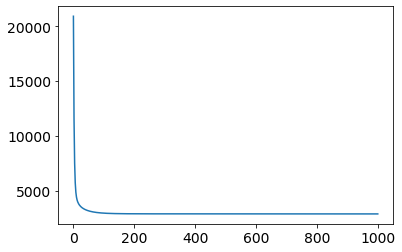

In [87]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [88]:
W, b

(array([ -57.95212281, -255.00843971,  550.58801869,  338.18762872,
        -152.89813005,  -49.45679526, -190.55368187,  114.4381102 ,
         527.97131425,   73.54316083]), 153.99198146705385)

(10) test 데이터에 대한 성능 확인하기

In [89]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2944.5055230247435

(11) 정답 데이터와 예측한 데이터 시각화하기

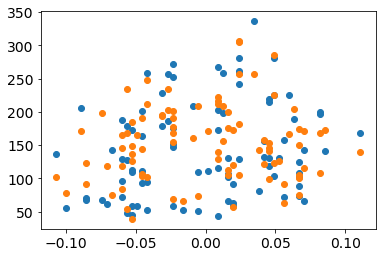

In [90]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [91]:
y_pred=model(X_test, W, b)  # 창현님 코딩 참조
#for i in range(len(y_pred)):
#print(y_pred[i],Y_test[i])

print('total accuracy(my_LR) = {:.2%}'.format(float((1-np.abs((y_pred-y_test)/y_test)).mean())))
print(W, b)

total accuracy(my_LR) = 60.36%
[ -57.95212281 -255.00843971  550.58801869  338.18762872 -152.89813005
  -49.45679526 -190.55368187  114.4381102   527.97131425   73.54316083] 153.99198146705385


**회고**

처음에 학습을 진행했을 때는 원하는 값이 나오지 않았습니다. 그래서, learning rate 와 트레이닝 횟수를 계속 조절하였고, loss값을 3000에 근접하도록 얻을 수 있었습니다.

**프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?**

(1) 데이터 가져오기

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [94]:
train.shape

(10886, 12)

In [95]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [96]:
train['datetime'] = pd.to_datetime(train['datetime']) # string에서 datetime 자료형으로 전환 : pd.to_datetime()

In [97]:
train['year'] = train['datetime'].dt.year # 건희님 코딩 참조
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [98]:
train.shape

(10886, 18)

In [99]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [100]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

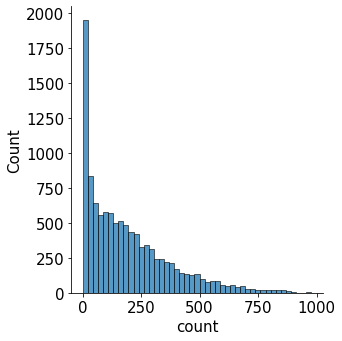

In [101]:
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

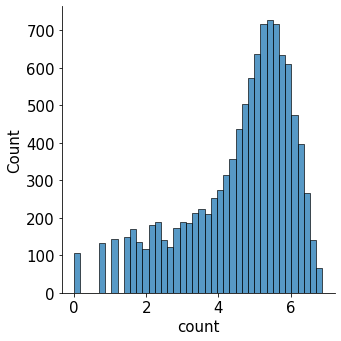

In [102]:
sns.displot(np.log(train['count']))

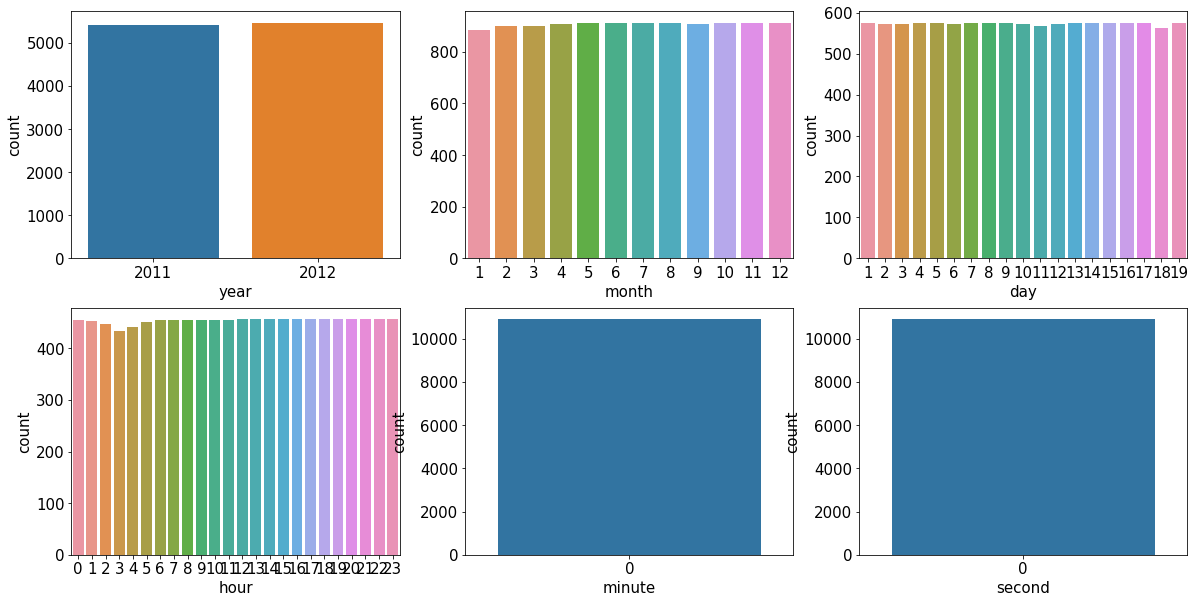

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x = 'year', data=train)

plt.subplot(2,3,2)
sns.countplot(x = 'month', data=train)

plt.subplot(2,3,3)
sns.countplot(x = 'day', data=train)

plt.subplot(2,3,4)
sns.countplot(x = 'hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x = 'minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x = 'second',data=train)

plt.show()

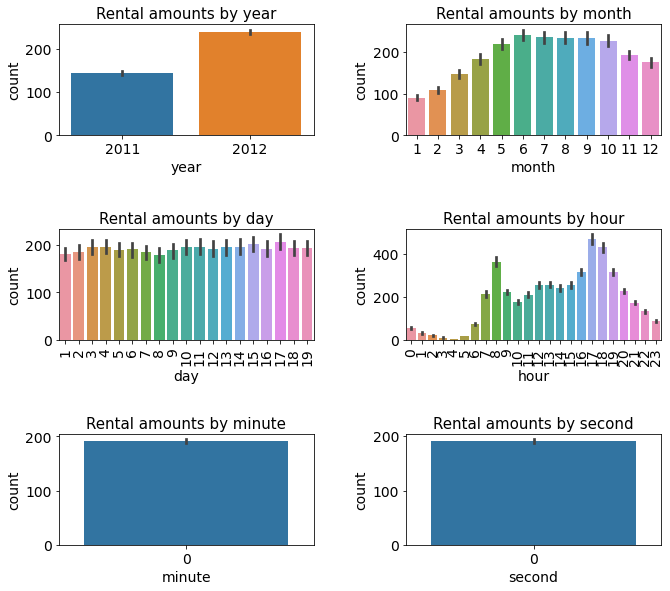

In [104]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(10, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')
axes[2, 0].set(title='Rental amounts by minute')
axes[2, 1].set(title='Rental amounts by second')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

In [105]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

(5) LinearRegression 모델 학습

In [107]:
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [109]:
predictions = model.predict(X_test)
predictions

array([[-33.96697339],
       [ 59.23679918],
       [112.62548605],
       ...,
       [195.79183719],
       [197.74006566],
       [294.24680107]])

In [110]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

140.47528542723464

In [111]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [112]:
X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,1.0,1.0,2.0,6.56,9.090,80.0,8.9981,2011.0,2.0,4.0,9.0,-33.966973,127
1,2.0,1.0,2.0,14.76,16.665,71.0,19.0012,2011.0,4.0,8.0,10.0,59.236799,73
2,3.0,1.0,3.0,24.60,27.275,88.0,8.9981,2011.0,9.0,7.0,9.0,112.625486,190
3,2.0,1.0,1.0,16.40,20.455,56.0,23.9994,2011.0,4.0,4.0,1.0,44.829705,11
4,4.0,1.0,2.0,22.14,25.760,49.0,8.9981,2012.0,10.0,17.0,13.0,303.039383,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,1.0,1.0,12.30,13.635,61.0,19.9995,2012.0,3.0,7.0,1.0,76.753725,5
2174,1.0,1.0,1.0,28.70,31.820,39.0,16.9979,2012.0,3.0,15.0,17.0,356.228964,713
2175,2.0,1.0,1.0,18.86,22.725,72.0,15.0013,2011.0,5.0,6.0,22.0,195.791837,151
2176,1.0,1.0,1.0,12.30,13.635,42.0,31.0009,2012.0,1.0,18.0,13.0,197.740066,130


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

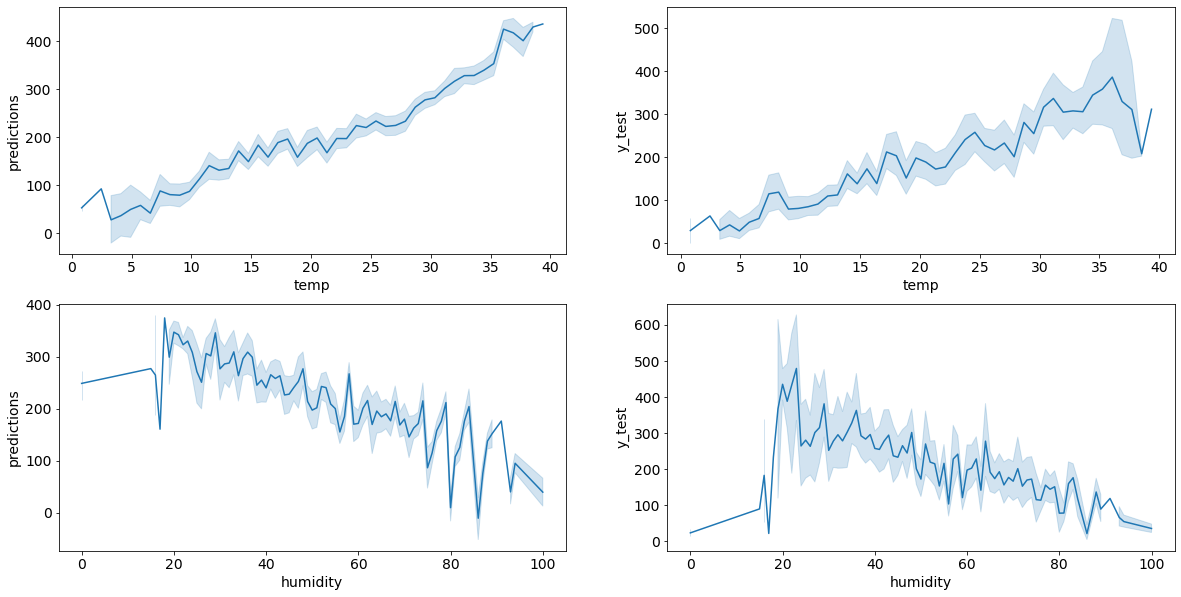

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

**회고**
​
처음에 학습을 진행했을 때, loss 값이 거의 0에 가까운 값이 나왔습니다. 모델이 너무 잘 맞추는 것이 'casual', 'registered' 속성 때문이라고 판단되어, 두 개의 속성을 제거하였습니다. 추가적으로 'holiday', 'minute', 'second' 속성도 제거하여, 학습을 진행하였습니다. 결과적으로 loss 값이 140.47 정도가 나왔습니다.